# MOwNiT
## Laboratorium 2
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji 0.14 : https://juliadata.github.io/DataFrames.jl/stable/index.html





In [1]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
│ Row │ MojaKolumna │ x2      │ Col3 │
│     │ Int64       │ Float64 │ Bool │
├─────┼─────────────┼─────────┼──────┤
│ 1   │ 1           │ 4.0     │ 1    │
│ 2   │ 2           │ 3.14159 │ 0    │
│ 3   │ 3           │ 1.41421 │ 1    │
│ 4   │ 4           │ 42.0    │ 0    │

In [2]:
typeof(df1[!,2])

Array{Float64,1}

In [3]:
typeof(df1.Col3)

Array{Bool,1}

In [4]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1
7,7,3.14159,1
8,8,1.41421,0
9,9,3.0,1


In [5]:
# ilosc wierszy
size(df2, 1) 

10

In [6]:
#ilosc kolumn
size(df2, 2) 

3

In [7]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [8]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [9]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
│ Row │ MojaKolumna │ Col2    │ Col3 │
│     │ Int64       │ Float64 │ Bool │
├─────┼─────────────┼─────────┼──────┤
│ 3   │ 3           │ 1.41421 │ 0    │

In [10]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,1
2,3,1.41421,0


In [11]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793 
 1.4142135623730951

In [12]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,1
2,1.41421,0


In [13]:
# pierwsze sześć wierszy
DataFrames.first(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1


In [14]:
# ostatnie sześć wierszy
DataFrames.last(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
10,10,4.0,0


In [15]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [16]:
# typy kolumn
eltype.(eachcol(df2))

3-element Array{DataType,1}:
 Int64  
 Float64
 Bool   

In [17]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,MojaKolumna,5.5,1,5.5,10,,,Int64
2,Col2,2.71116,1.41421,3.0,4.0,,,Float64
3,Col3,0.6,0,1.0,1,,,Bool


In [18]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [19]:
var(df2.Col2)

0.9150284373648316

In [20]:
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
,Float64,Float64,Float64,Float64,Float64,Float64
1,7.4,0.7,0.0,1.9,0.076,11.0
2,7.8,0.88,0.0,2.6,0.098,25.0
3,7.8,0.76,0.04,2.3,0.092,15.0
4,11.2,0.28,0.56,1.9,0.075,17.0
5,7.4,0.7,0.0,1.9,0.076,11.0
6,7.4,0.66,0.0,1.8,0.075,13.0
7,7.9,0.6,0.06,1.6,0.069,15.0
8,7.3,0.65,0.0,1.2,0.065,15.0
9,7.8,0.58,0.02,2.0,0.073,9.0


In [21]:
typeof(mydata)

DataFrame

In [22]:
size(mydata)

(1599, 12)

In [23]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
#https://juliadata.github.io/DataFrames.jl/stable/man/split_apply_combine.html
# przyklad: zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, df->size(df,1))

,quality,x1
,Int64,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [24]:
#zaawansowane dzialanie na podgrupach
df2=by(mydata, [:quality, :alcohol]) do mySubGroup
          DataFrame(size = size(mySubGroup,1))
        end
sort(df2, [:quality, :alcohol])

,quality,alcohol,size
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [25]:
# zapis do pliku
# https://juliadata.github.io/DataFrames.jl/stable/man/getting_started.html#Importing-and-Exporting-Data-(I/O)-1
CSV.write("dataframe1.csv", mydata)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest dodatkowy pakiet do pakietu Plots 

W przypadku własnej instalacji:

```julia
Pkg.add("StatPlots")
```
https://github.com/JuliaPlots/StatPlots.jl



In [26]:
using DataFrames
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10), d=rand(10), e=map(x->x%2,(1:10)))


,a,b,c,d,e
,Int64,Float64,Float64,Float64,Int64
1,1,5.78281,2.85157,0.723597,1
2,2,6.34687,6.84751,0.0157103,0
3,3,2.26772,8.73731,0.998553,1
4,4,3.39742,7.59878,0.885095,0
5,5,6.57826,3.03088,0.282309,1
6,6,2.79963,1.38926,0.457915,0
7,7,7.2789,6.96868,0.676716,1
8,8,0.969867,6.6483,0.944234,0
9,9,8.43311,8.11304,0.00242398,1


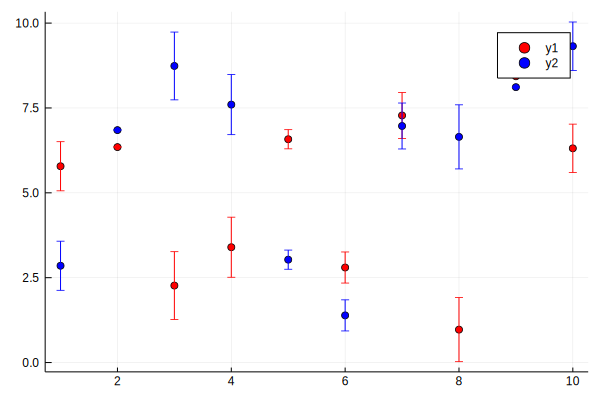

In [27]:
# zamiast makra @df z pakietu StatPlots mozna odwolywac sie bezposrednio do kolumn (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
using Plots
scatter(df.a, [df.b, df.c], colour = [:red :blue], yerr=df.d)


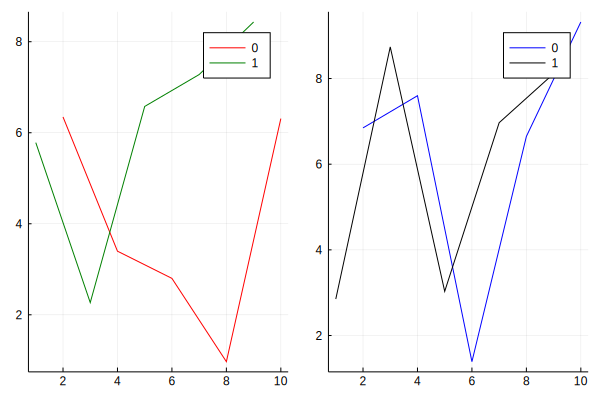

In [28]:
plot(df.a, [df.b, df.c], group=df.e, colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.